## Data preparation
### Lecture 
The original dataset has been transformed after an important preprocessing step in this [notebook](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb). We skip this step today! 

In [7]:
# Library Importation.
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [8]:
# Lecture of the data frame
df = pd.read_table('vispremv.dat', delimiter=' ')
#Give the size of the dataset

In [9]:
# Produce a list of quantitative variables
df.describe()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,132.574788,42.573848,0.627211,2.371296,6.715418,0.827903,4.477338,1.868891,2.394713,1.028222,...,1.468485,0.649106,4.161701,0.760113,4.726685,8.564440,0.136406,9.373976,3.043170,1.189791
std,93.499830,11.912343,0.685315,1.464376,4.907295,1.279475,5.473534,3.680483,4.540024,0.501554,...,1.280262,0.794352,5.205502,0.782235,4.662683,11.738092,0.379837,3.313518,4.665580,1.587594
min,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,33.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067305,0.000000,0.000000
50%,130.000000,43.000000,0.693147,2.564949,8.652248,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.882802,2.000000,0.000000,10.075969,0.000000,0.000000
75%,204.500000,52.000000,1.098612,3.349750,10.962298,1.945910,10.483833,0.000000,0.000000,1.000000,...,2.000000,1.000000,10.033572,1.000000,9.651494,14.000000,0.000000,11.649131,6.216606,2.441401
max,393.000000,65.000000,3.367296,7.451242,13.785052,4.605170,15.060512,13.123924,14.296852,4.000000,...,9.000000,4.000000,13.270100,4.000000,13.785052,69.000000,4.000000,16.045468,15.770893,4.905275


Verify that most of the variables are described by a quantitative and a qualitative version.

Qualitative variables  (sexe, csp, famille)  are transformed into quantitative ones except `CARVP`. How? 

In [10]:
df.dtypes

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

In [11]:
# Transformation of qualitative variables into quantitative 0/1 ones.
vispremDum = pd.get_dummies(df[["SEXEQ", "FAMIQ", "PCSPQ"]])
vispremDum.drop(["SEXEQ_Sfem", "FAMIQ_Fcou"], axis=1, inplace=True)

# Aggregation of the previous variables with numeric ones
vispremNum = vispremDum.select_dtypes(exclude = ['object'])
vispremR = pd.concat([vispremDum, vispremNum], axis=1)

**Q** How many samples and how many variables?

In [12]:
#TODO Compute the number of samples and the number of variables
print(f" Number of samples : {vispremR.shape[0]} \n Number of variables : {vispremR.shape[1]}")

 Number of samples : 1063 
 Number of variables : 14


In [13]:
# The variable CARVP is modified into 0/1
df["CARVP"] = df["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)
df["CARVP"]

148009     1
552427     1
556005     1
556686     1
642680     1
          ..
7567726    0
7572458    0
7574479    0
7580358    0
7589439    0
Name: CARVP, Length: 1063, dtype: int64

### Extraction of the learning and test set

In [14]:
rd_seed = 123 # Modify this sieve initialization
npop = len(df)

#TODO Find xApp,xTest,yApp,yTest with the help of train_test_split
#We will place 200 samples in the test set

x_vars = vispremR
y_var = df[["CARVP"]]
xApp, xTest, yApp, yTest = train_test_split(x_vars, y_var, test_size = 200, random_state = rd_seed)

## [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
This "old" method is still commonly used, mainly because of its simplicity, interpretability and diffusion over years.

### Estimation and optimization
The model selection procedure involves a statistical penalization: *ridge*, Lasso or a combination of both (*elastic net*). The behaviour of the model selection in Python is not exactly comparable with the one used in R (*stepwise, backward, forward*) that optimizes *AIC*

#### *Lasso* Optimization


We first consider the **Lasso** penalty, which is proportional to the L1 norm of the parameter we are looking for. This penalty induces sparsity of the response coefficient vector.

In [15]:
# Convert y into a 1D array
yApp = np.array(yApp["CARVP"])
yTest = np.array(yTest["CARVP"])

In [16]:
from sklearn.linear_model import LogisticRegression
# Grid of penalty parameters
param = [{"C": [0.5, 1, 5, 10, 12, 15, 30]}] # dictionary of the values of C used for GridSearchCV
# TODO
# 1. Define a model (logistic regression)
# 2. Use the penalty="l1"
# 3. Use GridSearchCV to obtain automatically the best regularization parameter 
# 4. In what follows, this method will be denoted by logitLasso !

logit_model = LogisticRegression(penalty="l1", solver="liblinear")

grid_search_cv = GridSearchCV(logit_model, param, cv=5)

logitLasso = grid_search_cv.fit(xApp, yApp)

In [17]:
# Computation of the loss
print("Best learning rate = %f, Best parameter  = %s" %
      (1.-logitLasso.best_score_, logitLasso.best_params_))

Best learning rate = 0.231758, Best parameter  = {'C': 0.5}


Prediction error


In [18]:
# Prediction with the model
yChap = logitLasso.predict(xTest)
# TODO:  compute the  confusion matrix with the help of pd.crosstab

confusion_matrix = pd.crosstab(yTest, yChap, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix, "\n")

# Error on the test set
print("Test error - Logistic regression  Lasso = %f" % (1-logitLasso.score(xTest, yTest)))

prediction    0   1
true value         
0           105  29
1            30  36 

Test error - Logistic regression  Lasso = 0.295000


#### *Ridge* Optimization 
On considère maintenant l'optimisation Ridge, ou la pénalité est proportionnelle à la norme 2 de l'estimateur (au carré)


In [19]:
# Grid of penalty parameters
param=[{"C":[0.5,1,5,10,12,15,30]}]
# TODO
# 1. Define a model (logistic regression)
# 2. Use the penalty="l2"
# 3. Use GridSearchCV to obtain automatically the best regularization parameter 
# 4. In what follows, this method will be denoted by logitRidge!

logit_model_ridge = LogisticRegression(penalty="l2")

gs_cv_ridge= GridSearchCV(logit_model_ridge, param, cv=5)

logitRidge = gs_cv_ridge.fit(xApp, yApp)

In [20]:
# Error computation  
print("Best score = %f, Best parameter = %s" %
      (1. - logitRidge.best_score_, logitRidge.best_params_))

Best score = 0.231758, Best parameter = {'C': 0.5}


In [21]:
# Prediction 
yChap_ridge = logitRidge.predict(xTest)

#Todo confusion matrix 

confusion_matrix_ridge = pd.crosstab(yTest, yChap_ridge, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_ridge, "\n")

# Error on the test set
print("Erreur de test régression Ridge = %f" % (1-logitRidge.score(xTest, yTest)))

prediction    0   1
true value         
0           105  29
1            30  36 

Erreur de test régression Ridge = 0.295000


**Q** Note the prediction errors and compare them with the ones predicted by the cross validation step.

### Interpretation

LassoOpt produced by GridSearchCV does not record the values of the parameters learnt by the model. It is then necessary to launch another time this model with the optimal value of the parameter if we wish to show the values of the coefficients.

In [24]:
LassoOpt = LogisticRegression(penalty="l1", solver="liblinear", C=12)
LassoOpt = LassoOpt.fit(xApp, yApp)

# Storage of the coefficients
vect_coef = np.matrix.transpose(LassoOpt.coef_)
vect_coef = vect_coef.ravel()

#Show the most important 25 coefficients
coef = pd.Series(abs(vect_coef),index=xApp.columns).sort_values(ascending=False)
print(coef)

PCSPQ_Pcad    2.865902
PCSPQ_Psan    2.135500
PCSPQ_Pouv    1.168706
SEXEQ_Shom    1.149357
SEXEQ_Shom    0.458129
PCSPQ_Pemp    0.405564
PCSPQ_Pcad    0.298355
PCSPQ_Psan    0.165312
PCSPQ_Pouv    0.148422
FAMIQ_Fseu    0.104266
FAMIQ_Fseu    0.000739
PCSPQ_Pemp    0.000004
PCSPQ_Pint    0.000000
PCSPQ_Pint    0.000000
dtype: float64


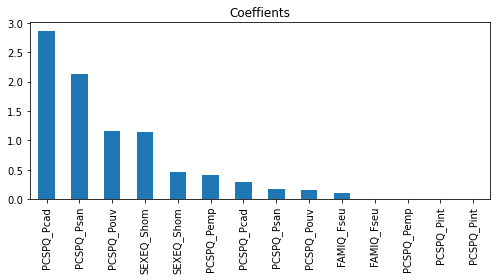

In [26]:
plt.figure(figsize=(7,4))
coef.plot(kind='bar')
plt.title('Coeffients')
plt.tight_layout()
plt.show()

**Q** What are the important variables? How to draw some conclusion/interpretation?

**Q** Is the Lasso penalty efficient?

It would be interesting to compare with the *ridge* and *elastic net* model

### ROC Curve

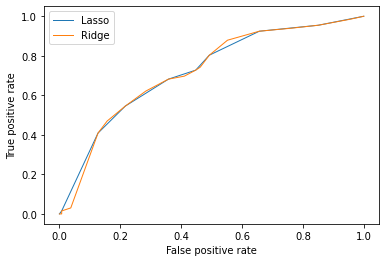

In [28]:
from sklearn.metrics import roc_curve
listMethod=[["Lasso",logitLasso],["Ridge",logitRidge]]

for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

## Discriminant analysis
Three methods are availables: parametric ones with LDA-QDA and a non parametric one (*k* nearest neighbor).

In [29]:
from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier

### Linear Discriminant Analysis (LDA)
Estimation of the model (there is no feature selection step) and then prediction over the test set.

In [36]:
# TODO:
# 1. Define the model ('lda' as discriminant_analysis.LinearDiscriminantAnalysis)
# 2. Fit the model
# 3. Predict on the test set
# 4. Compute the confusion matrix

lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(xApp, yApp)

yChap_lda = lda.predict(xTest)

confusion_matrix_lda = pd.crosstab(yTest, yChap_lda, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_lda, "\n")

# Prediction on the test set
print("Erreur de test lda = %f" % (1-lda.score(xTest, yTest)))

prediction    0   1
true value         
0           105  29
1            30  36 

Erreur de test lda = 0.295000


In [ ]:
# Same procedure as the one of LDA for QDA

**Q** What about the quality of the prediction? The ability of interpret the method?

**Q** What is the meaning of the warning? What are the variables involved by this warning?

# A PARTIR D'ICI

### Quadratic Discriminant Analysis (LDA)

In [36]:
# TODO:
# 1. Define the model ('lda' as discriminant_analysis.quadraticDiscriminantAnalysis)
# 2. Fit the model
# 3. Predict on the test set
# 4. Compute the confusion matrix

lda = discriminant_analysis.quadraticDiscriminantAnalysis().fit(xApp, yApp)

yChap_lda = lda.predict(xTest)

confusion_matrix_lda = pd.crosstab(yTest, yChap_lda, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_lda, "\n")

# Prediction on the test set
print("Erreur de test lda = %f" % (1-lda.score(xTest, yTest)))

prediction    0   1
true value         
0           105  29
1            30  36 

Erreur de test lda = 0.295000


### K Nearest Neighbors

In [ ]:
# TODO
# 1. Define the model with the 10 nearest neighbors (use KNeighborsClassifier)
# 2. Fit the model
# 3. Predict on the test set
# 4. Show the confusion matrix 

print(table)
# Prediction error on the test set
print("Erreur de test knn = %f" % (1-disKnn.score(xTest,yTest)))


In [ ]:
#Optimization of the smoothing parameter (number of neighbors) k
#Grid 
param_grid=[{"n_neighbors":list(range(1,15))}]
disKnn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
disKnnOpt=disKnn.fit(xApp, yApp) # GridSearchCV is itself an estimator 
# Optimal parameter 
disKnnOpt.best_params_["n_neighbors"]
print("Best score = %f, Best parameter = %s" % (1.-disKnnOpt.best_score_,disKnnOpt.best_params_))

In [ ]:
# Prediction on the test set 
yChap = disKnnOpt.predict(xTest)
# Confusion matrix 
table=pd.crosstab(yChap,yTest)
print(table)

# Estimation of the prediction error on the test set 
print("Error rate of knn_opt = %f" % (1-disKnnOpt.score(xTest,yTest)))

ROC curve

In [ ]:
from sklearn.metrics import roc_curve
# List of the methods 
listMethod=[["lda",disLin],["qda",disQua],["knn",disKnnOpt]]
# Curves computation
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

## [Binary decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
Binary trees are competing well versu logistic regression and are commonly used in datascience. In particular, their interpretation are simple, which is a great advantage of this method. However, the optimization of the parameters involved in this method is somewhat versatile.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Define and fit the model
# TODO

**Q** What is the default homogeneity criterion used by this method?

**Q** What is the major drawback of the pruning step in  `Scikkit-learn` when compared to the  `rpart` library in R?

In [ ]:
# Optimization of the depth of the tree
#TODO

# optimal parameter
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))


In [ ]:
# Prediction on the test set
yChap = treeOpt.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)# Prediction error on the test set
print(" Prediction error on the test set = %f" % (1-treeOpt.score(xTest,yTest)))

In [ ]:
# Visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(xApp,yApp)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")  

In [ ]:
from IPython.display import Image
Image(filename='treeOpt.png')

### [Roc curve ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
Comparison of the previous methods

The default threshold   (0.5) is not necessarily the best one, and it is necessary to compare the ROC curves.

In [ ]:
# Liste of the  methods 
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt]]
# Roc curves 
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

Comment the results.

**Q** Interest of the logistic regression when compared to the LDA?

**Q** Consequence of the ROC curve crossing on the AUC evaluation?

The size of the test set (200) is modest...

## [Aggregation methods](https://en.wikipedia.org/wiki/Ensemble_learning)
We mainly compare here the three algorthms: *bagging, random forest, boosting*.

### *Bagging*

**Q** What is the default aggregated algorithm? 

**Q** What is the default number of estimators ? Is it necessary to optimize this number?

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag= # Def model (nestim =100)
bagC=bag.fit(xApp, yApp)
# Prediction on the test set
yChap = bagC.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Prediction error with bagging = %f" % (1-bagC.score(xTest,yTest)))


**Q** Run this previous cell several times. What do you think about the stability of the method and about the its reliability?

### *Random forest*

**Q** What is the parameter to be optimized for this algorithm? What is its default value?

**Q** Is the number of trees a versatile parameter?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Optimization  of max_features
param=[{"max_features":list(range(2,10,1))}]

rf= # TODO DEF gridsearchCV
rfOpt=rf.fit(xApp, yApp)
# optimal parameter 
print("Best score = %f, Best parameter = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
# Prediction on the test set
yChap = rfOpt.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Prediction error with  random forest opt -quantitative = %f" % (1-rfOpt.score(xTest,yTest)))

### *Gradient boosting*

**Q** What is the historical *boosting* algorithm? Which one is used now?

**Q** What are the important parameters to be tuned? How to calibrate them??

**Q** What is the default value of the parameter that is not optimized below?

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Optimization of two parameters
paramGrid = [
  {'n_estimators': list(range(100,601,50)), 'learning_rate': [0.1,0.2,0.3,0.4]}
 ]
gbmC= GridSearchCV(GradientBoostingClassifier(),paramGrid,cv=5,n_jobs=-1)
gbmOpt=gbmC.fit(xApp, yApp)
# Optimal parameters
print("Best score = %f, Best parameters = %s" % (1. - gbmOpt.best_score_,gbmOpt.best_params_))

In [ ]:
# Prediction on the test set
yChap = gbmOpt.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Test error of gbm opt = %f" % (1-gbmOpt.score(xTest,yTest)))

### Courbes ROC

In [ ]:
# List of the methods
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt],["RF",rfOpt],["GBM",gbmOpt]]
# ROC curves computation 
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
plt.legend(loc="best")
send(plt,17)
plt.show()

**Q** What is the best interpretable method? What is the best method?

**Q** What can you say about the *extrem gradient boosting* ? Number of parameters to be tuned? In Python? In R? Its diffusion?

**Exercice** Add the deep learning and SVM family of methods.